In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import re


In [136]:
cw = pd.read_csv('cw_full.csv')
cw.drop("Unnamed: 0", axis=1, inplace=True)
print cw.shape
cw.head()

(120507, 8)


,title,clue,date,year,answer,unique,day,answer_count
0,,One may hold a ship in place,December 23,2016,TRACTORBEAM,True,Friday,1
1,,Network initials,December 23,2016,DSL,False,Friday,17
2,,Visa option,December 23,2016,CASHADVANCE,True,Friday,1
3,,"It resembles an ""n"" when lowercase",December 23,2016,ETA,False,Friday,69
4,,"Northeast nickname, with ""the""",December 23,2016,EMPIRESTATE,False,Friday,1


In [137]:
cw_top_5000 = cw['answer'].value_counts().head(5000)
cw_top_5000.index
cw_top_5000

ERA         89
ORE         80
ONE         76
ODE         72
AREA        70
SPA         69
ALE         69
ETA         69
ERE         65
ALI         64
ERR         63
ARE         62
ACE         59
ATE         59
ELI         58
ALA         58
IRE         56
ERIE        54
END         53
LIE         53
OLE         53
TEE         53
ESS         53
APE         52
SEA         52
ICE         52
ELSE        52
EAR         52
ARIA        52
ANT         51
            ..
SCIFI        5
RENOIR       5
BRAD         5
KIDDO        5
ARIZONA      5
GAIT         5
CHIP         5
BARAK        5
VEX          5
GIVE         5
LAHTI        5
UPROAR       5
LICK         5
SCENARIO     5
COSTA        5
TOAT         5
ROANS        5
AFORE        5
YUL          5
VIEW         5
LOWE         5
REDSEA       5
BORON        5
HUTS         5
ATTACH       5
CLERK        5
ARCADE       5
WHEE         5
LEIS         5
IPA          5
Name: answer, dtype: int64

In [138]:
top_words = pd.read_csv('Top_5000_Words.csv')
print top_words.shape
top_words.head()

(5000, 5)


,Rank,Word,Part of speech,Frequency,Dispersion
0,1,the,a,22038615,0.98
1,2,be,v,12545825,0.97
2,3,and,c,10741073,0.99
3,4,of,i,10343885,0.97
4,5,a,a,10144200,0.98


In [139]:

common_words = set(top_words['Word']).intersection(cw['answer'].map(lambda x: str(x).lower()))
print len(common_words)
print len(set(top_words['Word']))
print len(top_words['Word'])
print len(cw['answer'])
common_words



2355
4352
5000
120507


{'limited',
 'four',
 'protest',
 'sleep',
 'mansion',
 'captain',
 'hate',
 'whose',
 'voter',
 'electricity',
 'bike',
 'under',
 'sorry',
 'pride',
 'hormone',
 'risk',
 'blanket',
 'rise',
 'every',
 'govern',
 'affect',
 'vast',
 'school',
 'prize',
 'frozen',
 'disc',
 'red',
 'calendar',
 'enhance',
 'triumph',
 'clothes',
 'enjoy',
 'chew',
 'force',
 'tired',
 'mail',
 'direct',
 'pulse',
 'horn',
 'chef',
 'second',
 'persuade',
 'ideology',
 'monster',
 'even',
 'admire',
 'hide',
 'selected',
 'above',
 'toll',
 'new',
 'net',
 'ever',
 'hero',
 'herb',
 'never',
 'here',
 'studio',
 'hers',
 'path',
 'dry',
 'substance',
 'auction',
 'credit',
 'smoke',
 'golden',
 'secure',
 'straw',
 'moral',
 'glance',
 'total',
 'unit',
 'plot',
 'army',
 'sweater',
 'achieve',
 'negative',
 'call',
 'asset',
 'strike',
 'type',
 'tell',
 'holy',
 'relax',
 'expose',
 'award',
 'aware',
 'warn',
 'phone',
 'warm',
 'adult',
 'prescription',
 'hole',
 'hold',
 'origin',
 'shoot',
 'word

In [140]:
common_words = set(top_words['Word']).intersection(cw_top_5000.index.map(lambda x: str(x).lower()))
print len(common_words)
print common_words

781
set(['essay', 'all', 'code', 'sales', 'rod', 'alien', 'disc', 'per', 'moon', 'hate', 'row', 'one', 'leap', 'send', 'tail', 'under', 'norm', 'song', 'far', 'dessert', 'rise', 'fat', 'aware', 'fan', 'awful', 'vast', 'four', 'hour', 'tear', 'die', 'list', 'gun', 'try', 'item', 'sand', 'race', 'math', 'team', 'dip', 'athlete', 'chew', 'ten', 'thin', 'tea', 'isolate', 'crop', 'cash', 'nail', 'rate', 'cost', 'mayor', 'pass', 'acid', 'odd', 'port', 'even', 'aim', 'sue', 'poke', 'appear', 'ugly', 'sum', 'melt', 'access', 'toll', 'new', 'net', 'ever', 'era', 'hero', 'leg', 'herb', 'clerk', 'loose', 'here', 'water', 'let', 'cart', 'meet', 'alone', 'sing', 'arena', 'great', 'stair', 'ahead', 'host', 'trial', 'jaw', 'gene', 'via', 'love', 'apple', 'extra', 'win', 'pasta', 'motor', 'limb', 'total', 'unit', 'use', 'fee', 'eye', 'army', 'sake', 'give', 'two', 'next', 'asset', 'type', 'tell', 'teen', 'riot', 'club', 'trait', 'award', 'clue', 'warn', 'glass', 'adult', 'hole', 'editor', 'glad', 'fly

In [141]:
set(cw_top_5000.index.map(lambda x: str(x).lower())).difference(common_words)

{'aided',
 'fawn',
 'ams',
 'dote',
 'yentl',
 'ciao',
 'hats',
 'yenta',
 'knelt',
 'foul',
 'hitch',
 'sleet',
 'andre',
 'asian',
 'ornate',
 'sci',
 'oldest',
 'loll',
 'sch',
 'stub',
 'swag',
 'onus',
 'chinese',
 'ergs',
 'paris',
 'spew',
 'swan',
 'otra',
 'sinew',
 'tween',
 'swat',
 'aus',
 'rei',
 'lori',
 'swap',
 'abra',
 'lore',
 'lord',
 'sped',
 'ergo',
 'spec',
 'onsale',
 'eire',
 'lure',
 'geode',
 'rel',
 'omoo',
 'tudor',
 'deli',
 'egotrip',
 'aurora',
 'oceans',
 'dell',
 'vase',
 'pta',
 'arles',
 'aviate',
 'anemia',
 'ahab',
 'upi',
 'elihu',
 'natl',
 'utne',
 'upc',
 'reg',
 'shoed',
 'goya',
 'ree',
 'hesse',
 'orzo',
 'elegy',
 'hora',
 'annie',
 'chet',
 'overdo',
 'cher',
 'esos',
 'betsy',
 'snafu',
 'oops',
 'ents',
 'entr',
 'cesar',
 'seth',
 'neo',
 'evel',
 'errors',
 'gnc',
 'asif',
 'ned',
 'nee',
 'nec',
 'asia',
 'nea',
 'ibar',
 'nogo',
 'nez',
 'binet',
 'blur',
 'ebbs',
 'tips',
 'asis',
 'nes',
 'told',
 'med',
 'meg',
 'mea',
 'dahl',
 'z

In [142]:
alphabet = [chr(i) for i in range(ord('a'), ord('z')+1)]
alphabet

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [143]:
top_letters = dict.fromkeys(alphabet, 0)


for letter in alphabet:
    for word in top_words['Word']:
        if re.search(pattern=letter, string=word) != None:
            top_letters[letter]+= len(re.findall(pattern=letter, string=word))
    print letter, top_letters[letter]

N = float(reduce(lambda x,y: x+y, top_letters.values()))
N

a 2552
b 507
c 1517
d 1011
e 3977
f 517
g 688
h 785
i 2611
j 52
k 273
l 1755
m 888
n 2263
o 2147
p 1012
q 53
r 2497
s 1878
t 2582
u 1029
v 436
w 343
x 112
y 628
z 41


32154.0

In [144]:
top_cw_letters = dict.fromkeys(alphabet, 0)

for letter in alphabet:
    for word in cw_top_5000.index:
        if re.search(pattern=letter, string=word.lower()) != None:
            top_cw_letters[letter]+= len(re.findall(pattern=letter, string=word.lower()))
    print letter, top_cw_letters[letter]

    
    
M = float(reduce(lambda x,y: x+y, top_cw_letters.values()))
M

a 2554
b 390
c 574
d 724
e 2740
f 169
g 362
h 472
i 1265
j 44
k 199
l 1022
m 619
n 1168
o 1711
p 597
q 10
r 1377
s 1896
t 1504
u 411
v 158
w 208
x 81
y 278
z 57


20590.0

In [145]:
top_cw_letters_scaled = pd.DataFrame({'letter': top_cw_letters.keys(), 'cw_freq': top_cw_letters.values()})
top_cw_letters_scaled.head()
top_letters_scaled = pd.DataFrame({'letter': top_letters.keys(), 'freq': top_letters.values()})
top_letters_scaled.head()

letter_freq = pd.merge(top_letters_scaled, top_cw_letters_scaled, on='letter')

letter_freq['freq'] = letter_freq['freq'].map(lambda x: x/N)
letter_freq['cw_freq'] = letter_freq['cw_freq'].map(lambda x: x/M)
letter_freq

,freq,letter,cw_freq
0,0.079368,a,0.124041
1,0.047179,c,0.027878
2,0.015768,b,0.018941
3,0.123686,e,0.133074
4,0.031442,d,0.035163
5,0.021397,g,0.017581
6,0.016079,f,0.008208
7,0.081203,i,0.061438
8,0.024414,h,0.022924
9,0.008490,k,0.009665


In [146]:
letter_freq['freq'].corr(letter_freq['cw_freq'])

letter_freq['difference'] = letter_freq['cw_freq'] - letter_freq['freq'] 
letter_freq.sort_values('letter', inplace=True)
letter_freq

letter_freq[abs(letter_freq['difference']) > .01]

,freq,letter,cw_freq,difference
0,0.079368,a,0.124041,0.044673
1,0.047179,c,0.027878,-0.019302
7,0.081203,i,0.061438,-0.019765
14,0.070380,n,0.056727,-0.013653
13,0.066772,o,0.083099,0.016326
18,0.077658,r,0.066877,-0.010780
17,0.058406,s,0.092084,0.033677
19,0.032002,u,0.019961,-0.012041


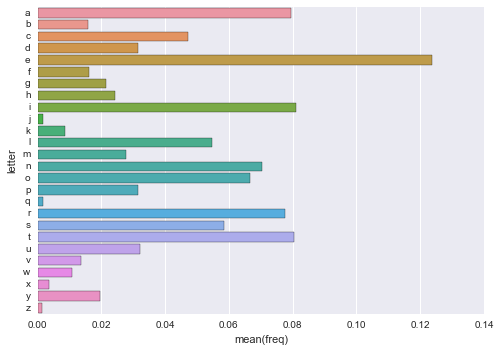

In [147]:
sns.barplot(y="letter", x="freq", data=letter_freq, order=alphabet, orient='h')
sns.despine(left=True, bottom=True)
sns.plt.show()

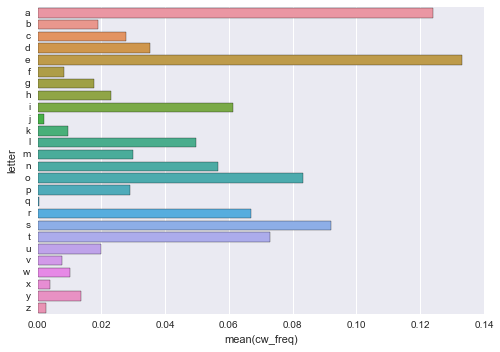

In [148]:
sns.barplot(y="letter", x="cw_freq", data=letter_freq, order=alphabet, orient='h')
sns.despine(left=True, bottom=True)
sns.plt.show()

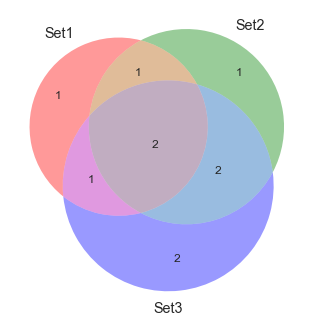

In [115]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
venn3(subsets = (1, 1, 1, 2, 1, 2, 2), set_labels = ('Set1', 'Set2', 'Set3'))
plt.show()

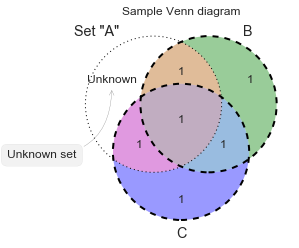

In [111]:
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

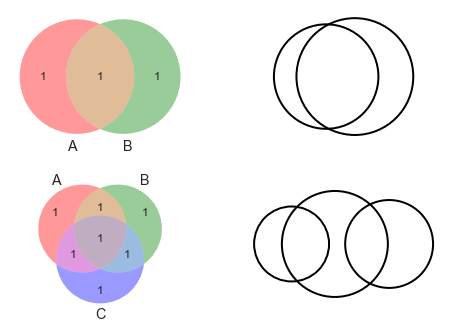

In [112]:
from matplotlib_venn import venn2, venn2_circles
figure, axes = plt.subplots(2, 2)
venn2(subsets={'10': 1, '01': 1, '11': 1}, set_labels = ('A', 'B'), ax=axes[0][0])
venn2_circles((1, 2, 3), ax=axes[0][1])
venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'), ax=axes[1][0])
venn3_circles({'001': 10, '100': 20, '010': 21, '110': 13, '011': 14}, ax=axes[1][1])
plt.show()

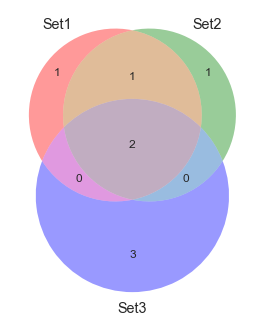

In [113]:
set1 = set(['A', 'B', 'C', 'D'])
set2 = set(['B', 'C', 'D', 'E'])
set3 = set(['C', 'D',' E', 'F', 'G'])

venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()

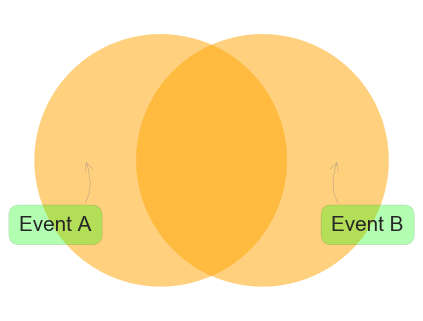

In [116]:
from matplotlib_venn import *
from matplotlib import pyplot as plt
v = venn2(subsets = {'10': 1, '01': 1, '11': 1}, set_labels = ('A', 'B'))
v.get_patch_by_id('10').set_alpha(0.5)
v.get_patch_by_id('10').set_color('orange')
v.get_patch_by_id('01').set_alpha(0.5)
v.get_patch_by_id('01').set_color('orange')
v.get_patch_by_id('11').set_alpha(0.75)
v.get_patch_by_id('11').set_color('orange')
v.get_label_by_id('10').set_text('')
v.get_label_by_id('01').set_text('')
v.get_label_by_id('11').set_text('')
v.get_label_by_id('A').set_text('')
v.get_label_by_id('B').set_text('')
v.get_label_by_id('A').set_size(20)
v.get_label_by_id('B').set_size(20)
plt.annotate('Event A', xy = v.get_label_by_id('10').get_position(), xytext = (-30,-70), size = 'xx-large',
            ha = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round, pad=0.5', fc = 'lime', alpha = 0.3),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0.5', color = 'gray'))

plt.annotate('Event B', xy = v.get_label_by_id('01').get_position(), xytext = (30,-70), size = 'xx-large',
            ha = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'lime', alpha = 0.3),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad = -0.5',color = 'gray'))

plt.show()

In [149]:
import plotly 
plotly.tools.set_credentials_file(username='rachel1792', api_key='NadQALGhVp1LrUk89ibz')



In [151]:
import plotly.plotly as py
import plotly.figure_factory as ff

df = [dict(Task="Job A", Start='2016-01-01', Finish='2016-01-02', Resource='Apple'),
      dict(Task="Job B", Start='2016-01-02', Finish='2016-01-04', Resource='Grape'),
      dict(Task="Job C", Start='2016-01-02', Finish='2016-01-03', Resource='Banana')]

colors = dict(Apple = 'rgb(220, 0, 0)',
              Grape = 'rgb(170, 14, 200)',
              Banana = (1, 0.9, 0.16))

fig = ff.create_gantt(df, colors=colors, index_col='Resource', show_colorbar=True)
py.iplot(fig, filename='gantt-dictioanry-colors', world_readable=True)